In [8]:
from sklearn import datasets
import pandas as pd

In [16]:
data_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url,sep=";")

In [17]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
data.shape

(1599, 12)

In [19]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [33]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [20]:
X = data.drop('quality',axis=1)
y = data.quality

In [23]:
from sklearn.cross_validation import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=22)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(1279, 11)
(320, 11)
(1279L,)
(320L,)


In [25]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
y_pred_test = lm.predict(X_test)
data_pred_test = pd.DataFrame(zip(y_test,y_pred_test),columns=['actual','predicted'])
data_pred_test.head()

,actual,predicted
0,5,5.440464
1,5,5.383214
2,5,5.925577
3,6,6.540426
4,5,6.254236


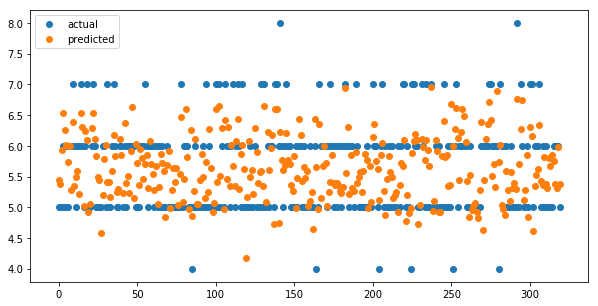

In [30]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data_pred_test.index,data_pred_test.actual,label="actual")
plt.scatter(data_pred_test.index,data_pred_test.predicted,label="predicted")
plt.legend()

In [35]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_pred_test = logReg.predict(X_test)
y_pred_train = logReg.predict(X_train)

In [38]:
data_pred_test = pd.DataFrame(zip(y_test,y_pred_test),columns=['actual','predicted'])
data_pred_test.head(10)

,actual,predicted
0,5,5
1,5,5
2,5,6
3,6,6
4,5,6
5,6,6
6,5,6
7,6,6
8,6,5
9,7,6


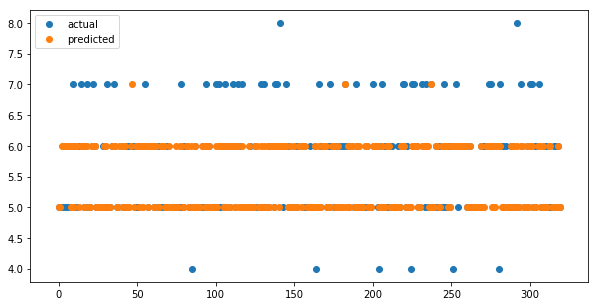

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(data_pred_test.index,data_pred_test.actual,label="actual")
plt.scatter(data_pred_test.index,data_pred_test.predicted,label="predicted")
plt.legend()

In [42]:
print "intercepts: ", logReg.intercept_
print "Coeff: ", logReg.coef_

intercepts:  [-0.01719721 -0.16199584  1.54865584 -0.69536172 -1.14758687 -0.59541855]
Coeff:  [[  1.20720128e-01   2.39035284e+00  -2.22690188e-01   1.56274606e-01
    3.32075360e-01   7.85446015e-02  -7.93774247e-02  -1.35032746e-02
    6.49524589e-01  -3.17693556e-01  -7.83643796e-01]
 [ -2.58587033e-01   2.43781910e+00   4.82274568e-03   1.85741323e-01
    1.85611627e-01  -1.98383869e-02  -1.25978682e-02  -1.65505433e-01
    3.55938767e-01  -5.72896397e-01  -2.73895501e-01]
 [  4.97467693e-02   1.68846464e+00   3.91906253e-01  -8.54871677e-02
    1.17632981e+00  -1.61894817e-02   2.01297811e-02   1.54378615e+00
    1.21601673e+00  -2.01508285e+00  -7.88029937e-01]
 [  4.01565653e-02  -1.57795756e+00  -1.15058386e+00  -1.88051815e-02
   -2.34043181e-01   2.35066403e-02  -1.26827418e-02  -6.56718202e-01
   -1.80912317e-01   9.91248676e-01   1.88094237e-01]
 [ -7.91596717e-02  -3.03824185e+00   1.69449352e-01   1.20156097e-01
   -1.14644739e+00  -3.01136088e-03  -1.40365982e-02  -1.15

In [44]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(y_test,y_pred_test)

[[  0   4   2   0   0]
 [  0 110  35   0   0]
 [  0  45  79   1   0]
 [  0   2  38   2   0]
 [  0   0   2   0   0]]


In [47]:
print 'Accuracy ', logReg.score(X_test, y_test)

Accuracy  0.596875


In [48]:
from sklearn.metrics import classification_report
print classification_report(y_test, y_pred_test)

             precision    recall  f1-score   support

          4       0.00      0.00      0.00         6
          5       0.68      0.76      0.72       145
          6       0.51      0.63      0.56       125
          7       0.67      0.05      0.09        42
          8       0.00      0.00      0.00         2

avg / total       0.59      0.60      0.56       320



C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
